# 张量和操作

This is an introductory TensorFlow tutorial that shows how to:

* Import the required package
* Create and use tensors
* Use GPU acceleration
* Demonstrate tf.data.Dataset

In [1]:
import tensorflow as tf

## Tensors

A Tensor is a multi-dimensional array. Similar to NumPy ndarray objects, tf.Tensor objects have a data type and a shape. 

In [2]:
print(tf.add(1, 2))
print(tf.add([1,2],[3,4]))
print(tf.square(5))
print(tf.reduce_sum([1,2,3]))

# Operator overloading is also supported
print(tf.square(2) + tf.square(3))

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)


In [3]:
# 每个tensor有shape和数据类型

x = tf.matmul([[1]], [[2,3]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor([[2 3]], shape=(1, 2), dtype=int32)
(1, 2)
<dtype: 'int32'>


Nunpy和tf.tensor最明显的不同：
1. Tensors can be backed by accelerator memory (like GPU, TPU).
2. Tensors are immutable.

Numpy的兼容性 ：tf.tensors和Numpy array是可以相互转换的

In [4]:
import numpy as np

ndarray = np.ones([3, 3])

print("TensorFlow operations convert numpy arrays to Tensors automatically")
tensor = tf.multiply(ndarray, 42)
print(tensor)

print("And NumPy operations convert Tensors to numpy arrays automatically")
print(np.add(tensor, 1))

print("The .numpy() method explicitly converts a Tensor to a numpy array")
print(tensor.numpy())

TensorFlow operations convert numpy arrays to Tensors automatically
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
And NumPy operations convert Tensors to numpy arrays automatically
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
The .numpy() method explicitly converts a Tensor to a numpy array
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


## GPU acceleration

In [5]:
x = tf.random.uniform([3,3])

print("Is there a GPU available: ")
print(tf.config.experimental.list_physical_devices("GPU"))

print("Is the Tnesor on GPU #0:")
print(x.device.endswith("GPU:0"))

Is there a GPU available: 
[]
Is the Tnesor on GPU #0:
False


In [6]:
# 未设置GPU，因此使用不了

The Tensor.device property provides a fully qualified string name of the device hosting the contents of the tensor. This name encodes many details, such as an identifier of the network address of the host on which this program is executing and the device within that host. This is required for distributed execution of a TensorFlow program. The string ends with GPU:<N> if the tensor is placed on the N-th GPU on the host.

In [7]:
# Explicit Device Placement

import time

def time_matmul(x):
    start = time.time()
    for loop in range(18):
        tf.matmul(x, x)
    result = time.time() - start
    
    print("10 loops: {:0.2f}ms".format(1000*result))
    
# Force execution on CPU
print("On CPU:")
with tf.device("CPU:0"):
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("CPU:0")
    time_matmul(x)

# Force execution on GPU #0  if available
if tf.config.experimental.list_physical_devices("GPU"):
    print("On GPU")
    with tf.device("GPU:0"):# Or GPU:1 for the 2nd GPU, GPU:2 for the 3rd etc.
        x = tf.random.uniform([1000, 1000])
        assert x.device.endswith("GPU:0")
        time_matmul(x)

On CPU:
10 loops: 532.80ms


## Datasets

This section uses the tf.data.Dataset API to build a pipeline for feeding data to your model. The tf.data.Dataset API is used to build performant, complex input pipelines from simple, re-usable pieces that will feed your model's training or evaluation loops.

### Create a source Dataset

Create a source dataset using one of the factory functions like Dataset.from_tensors, Dataset.from_tensor_slices, or using objects that read from files like TextLineDataset or TFRecordDataset.

In [8]:
ds_tensors = tf.data.Dataset.from_tensor_slices([1,2,3,4,5,6])

# Create a CSV file
import tempfile
_, filename = tempfile.mkstemp()

with open(filename, "w") as f:
    f.write("""Line 1
    Line 2
    Line 3
        """)
ds_file = tf.data.TextLineDataset(filename)

### Apply transformations

Use the transformations functions like map, batch, and shuffle to apply transformations to dataset records.

In [10]:
ds_tensors = ds_tensors.map(tf.square).shuffle(2).batch(2)

ds_file = ds_file.batch(2)

### Iterate

tf.data.Dataset objects support iteration to loop over records:

In [11]:
print("Elements of ds_tensors:")
for x in ds_tensors:
    print(x)
print("\nElements in ds_file:")
for x in ds_file:
    print(x)

Elements of ds_tensors:
tf.Tensor([1 9], shape=(2,), dtype=int32)
tf.Tensor([ 4 25], shape=(2,), dtype=int32)
tf.Tensor([36 16], shape=(2,), dtype=int32)

Elements in ds_file:
tf.Tensor([b'Line 1' b'    Line 2'], shape=(2,), dtype=string)
tf.Tensor([b'    Line 3' b'        '], shape=(2,), dtype=string)


# 自定义层

In [12]:
import tensorflow as tf

In [13]:
print(tf.test.is_gpu_available())

W0617 20:34:19.373306  9296 deprecation.py:323] From <ipython-input-13-ae932be897c3>:1: is_gpu_available (from tensorflow.python.framework.test_util) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False


## Layers: common sets of useful operations

In [14]:
# 使用keras建立模型

In [15]:
# In the tf.keras.layers package, layers are objects. To construct a layer,
# simply construct the object. Most layers take as a first argument the number
# of output dimensions / channels.
layer = tf.keras.layers.Dense(100)
# The number of input dimensions is often unnecessary, as it can be inferred
# the first time the layer is used, but it can be provided if you want to
# specify it manually, which is useful in some complex models.
layer = tf.keras.layers.Dense(10, input_shape=(None, 5))

In [16]:
# To use alayer, simply call it
layer(tf.zeros([10, 5]))

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [17]:
# Layers have many useful methods. For example, you can inspect all variables
# in a layer using `layer.variables` and trainable variables using
# `layer.trainable_variables`. In this case a fully-connected layer
# will have variables for weights and biases.
layer.variables

[<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.00611407,  0.50327903, -0.12255132,  0.5850387 ,  0.39190525,
          0.41334802, -0.55687153, -0.29118305,  0.2393024 , -0.19249034],
        [-0.34191906, -0.23270717, -0.53256464,  0.21271616, -0.19104412,
          0.61412257,  0.6076074 ,  0.10196376,  0.40348893,  0.41561896],
        [ 0.0452069 , -0.27632052,  0.21505564,  0.11101609, -0.17013916,
          0.30455893, -0.5790837 ,  0.39122528, -0.34200624,  0.58899146],
        [ 0.04744536,  0.22540778,  0.25509167,  0.1826961 ,  0.42946976,
         -0.6312893 ,  0.49893767,  0.13069212,  0.46065432, -0.5056257 ],
        [-0.30815557, -0.34109047,  0.18308729, -0.18647009,  0.1203385 ,
          0.20729876, -0.34399965,  0.1032111 , -0.60152644, -0.4219421 ]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [18]:
layer.trainable_variables

[<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.00611407,  0.50327903, -0.12255132,  0.5850387 ,  0.39190525,
          0.41334802, -0.55687153, -0.29118305,  0.2393024 , -0.19249034],
        [-0.34191906, -0.23270717, -0.53256464,  0.21271616, -0.19104412,
          0.61412257,  0.6076074 ,  0.10196376,  0.40348893,  0.41561896],
        [ 0.0452069 , -0.27632052,  0.21505564,  0.11101609, -0.17013916,
          0.30455893, -0.5790837 ,  0.39122528, -0.34200624,  0.58899146],
        [ 0.04744536,  0.22540778,  0.25509167,  0.1826961 ,  0.42946976,
         -0.6312893 ,  0.49893767,  0.13069212,  0.46065432, -0.5056257 ],
        [-0.30815557, -0.34109047,  0.18308729, -0.18647009,  0.1203385 ,
          0.20729876, -0.34399965,  0.1032111 , -0.60152644, -0.4219421 ]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [19]:
# The variables are also accessible through nice accessors
layer.kernel, layer.bias

(<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.00611407,  0.50327903, -0.12255132,  0.5850387 ,  0.39190525,
          0.41334802, -0.55687153, -0.29118305,  0.2393024 , -0.19249034],
        [-0.34191906, -0.23270717, -0.53256464,  0.21271616, -0.19104412,
          0.61412257,  0.6076074 ,  0.10196376,  0.40348893,  0.41561896],
        [ 0.0452069 , -0.27632052,  0.21505564,  0.11101609, -0.17013916,
          0.30455893, -0.5790837 ,  0.39122528, -0.34200624,  0.58899146],
        [ 0.04744536,  0.22540778,  0.25509167,  0.1826961 ,  0.42946976,
         -0.6312893 ,  0.49893767,  0.13069212,  0.46065432, -0.5056257 ],
        [-0.30815557, -0.34109047,  0.18308729, -0.18647009,  0.1203385 ,
          0.20729876, -0.34399965,  0.1032111 , -0.60152644, -0.4219421 ]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>)

## Implementing custom layers

The best way to implement your own layer is extending the tf.keras.Layer class and implementing:

1. __init__ , where you can do all input-independent initialization
2. build, where you know the shapes of the input tensors and can do the rest of the initialization
3. call, where you do the forward computation

Note that you don't have to wait until build is called to create your variables, you can also create them in __init__. However, the advantage of creating them in build is that it enables late variable creation based on the shape of the inputs the layer will operate on. On the other hand, creating variables in __init__ would mean that shapes required to create the variables will need to be explicitly specified.

In [22]:
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        super(MyDenseLayer, self).__init__()
        self.num_outputs = num_outputs
        
    def build(self, input_shape):
        self.kernel = self.add_weight("kernel",
                                     shape=[int(input_shape[-1]),
                                           self.num_outputs])
    def call(self, input):
        return tf.matmul(input, self.kernel)
    
layer = MyDenseLayer(10)

In [23]:
_ = layer(tf.zeros([10, 5])) # Calling the layer `.builds` it.

In [24]:
print([var.name for var in layer.trainable_variables])

['my_dense_layer/kernel:0']


## Models: Composing layers

Many interesting layer-like things in machine learning models are implemented by composing existing layers. For example, each residual block in a resnet is a composition of convolutions, batch normalizations, and a shortcut. Layers can be nested inside other layers.

Typically you inherit from keras.Model when you need the model methods like: Model.fit,Model.evaluate, and Model.save

One other feature provided by keras.Model (instead of keras.layers.Layer) is that in addition to tracking variables, a keras.Model also tracks its internal layers, making them easier to inspect.

In [26]:
# 例子： ResNet block

class ResnetIndentityBlock(tf.keras.Model):
    def __init__(self, kernel_size, filters):
        super(ResnetIndentityBlock, self).__init__(name="")
        filters1, filters2, filters3 = filters
        
        self.conv2a = tf.keras.layers.Conv2D(filters1, (1,1))
        self.bn2a = tf.keras.layers.BatchNormalization()
        
        self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding="same")
        self.bn2b = tf.keras.layers.BatchNormalization()
        
        self.conv2c = tf.keras.layers.Conv2D(filters3, (1,1))
        self.bn2c = tf.keras.layers.BatchNormalization()
        
    def call(self, input_tensor, training=False):
        x = self.conv2a(input_tensor)
        x = self.bn2a(x, training=training)
        x = tf.nn.relu(x)
        
        x = self.conv2b(x)
        x = self.bn2b(x, training=training)
        x = tf.nn.relu(x)
        
        x = self.conv2c(x)
        x = self.bn2c(x, training=training)
        
        x += input_tensor
        return tf.nn.relu(x)
    
block = ResnetIndentityBlock(1, [1,2,3])

In [27]:
_ = block(tf.zeros([1,2,3,3]))

In [28]:
block.layers

In [29]:
len(block.variables)

18

In [30]:
block.summary()

Model: "resnet_indentity_block_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            multiple                  4         
_________________________________________________________________
batch_normalization_2 (Batch multiple                  4         
_________________________________________________________________
conv2d_3 (Conv2D)            multiple                  4         
_________________________________________________________________
batch_normalization_3 (Batch multiple                  8         
_________________________________________________________________
conv2d_4 (Conv2D)            multiple                  9         
_________________________________________________________________
batch_normalization_4 (Batch multiple                  12        
Total params: 41
Trainable params: 29
Non-trainable params: 12
_____________________________________________

Much of the time, however, models which compose many layers simply call one layer after the other. This can be done in very little code using tf.keras.Sequential:

In [31]:
my_seq = tf.keras.Sequential([
    tf.keras.layers.Conv2D(1, (1,1),input_shape=(None, None, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(2, 1, padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(3, (1,1)),
    tf.keras.layers.BatchNormalization()
])

my_seq(tf.zeros([1,2,2,3]))

<tf.Tensor: shape=(1, 2, 2, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

In [32]:
my_seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, None, None, 1)     4         
_________________________________________________________________
batch_normalization_5 (Batch (None, None, None, 1)     4         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, None, None, 2)     4         
_________________________________________________________________
batch_normalization_6 (Batch (None, None, None, 2)     8         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, None, None, 3)     9         
_________________________________________________________________
batch_normalization_7 (Batch (None, None, None, 3)     12        
Total params: 41
Trainable params: 29
Non-trainable params: 12
___________________________________________________________

# 自动微分

In [33]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

### 梯度带

TensorFlow 为自动微分提供了 tf.GradientTape API ，根据某个函数的输入变量来计算它的导数。Tensorflow 会把 'tf.GradientTape' 上下文中执行的所有操作都记录在一个磁带上 ("tape")。 然后基于这个磁带和每次操作产生的导数，用反向微分法（"reverse mode differentiation"）来计算这些被“记录在案”的函数的导数。

In [34]:
# 例如

x = tf.ones((2,2))

with tf.GradientTape() as t:
    t.watch(x)
    y = tf.reduce_sum(x)
    z = tf.multiply(y, y)
    
# Derivative of z with respect to the original input tensor x
dz_dx = t.gradient(z, x) # z对x的导数
for i in [0, 1]:
    for j in [0, 1]:
        assert dz_dx[i][j].numpy() == 8.0

你也可以使用 tf.GradientTape 上下文计算过程产生的中间结果来求取导数。

In [36]:
x = tf.ones((2,2))

with tf.GradientTape() as t:
    t.watch(x)
    y = tf.reduce_sum(x)
    z = tf.multiply(y, y)
    
# Use the tape to compute the derivative of z with respect to the
# intermediate value y.
dz_dy = t.gradient(z, y)
assert dz_dy.numpy() == 8.0

默认情况下，调用 GradientTape.gradient() 方法时， GradientTape 占用的资源会立即得到释放。通过创建一个持久的梯度带，可以计算同个函数的多个导数。这样在磁带对象被垃圾回收时，就可以多次调用 'gradient()' 方法。例如：

In [37]:
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as t:
    t.watch(x)
    y = x * x
    z = y * y
    
dz_dx = t.gradient(z, x) # 108.0 (4*x^3 at x = 3)
dy_dx = t.gradient(y, x) # 6.0
del t # Drop the reference to the tape

记录控制流

由于磁带会记录所有执行的操作，Python 控制流（如使用 if 和 while 的代码段）自然得到了处理。

In [38]:
def f(x, y):
    output = 1.0
    for i in range(y):
        if i > 1 and i < 5:
            output = tf.multiply(output, x)
    return output

def grad(x, y):
    with tf.GradientTape() as t:
        t.watch(x)
        out = f(x, y)
    return t.gradient(out, x)

x = tf.convert_to_tensor(2.0)

assert grad(x, 6).numpy() == 12.0
assert grad(x, 5).numpy() == 12.0
assert grad(x, 4).numpy() == 4.0

高阶导数

在 'GradientTape' 上下文管理器中记录的操作会用于自动微分。如果导数是在上下文中计算的，导数的函数也会被记录下来。因此，同个 API 可以用于高阶导数。例如：

In [40]:
x = tf.Variable(1.0) # Create a tensorflow variable initialized to 1.0

with tf.GradientTape() as t1:
    with tf.GradientTape() as t2:
        y = x * x * x
    # Compute the gradient inside the 't' context manager
    # which means the gradient computation is differentiable as well.
    dy_dx = t2.gradient(y, x)
d2y_dx2 = t1.gradient(dy_dx, x)

assert dy_dx.numpy() == 3.0
assert d2y_dx2.numpy() == 6.0

# 自定义训练

In [42]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

变量

Tensorflow 中的 tensor 是不可变无状态对象。机器学习模型需要可改变状态，比如模型训练和模型预测的代码是相同的，但变量值随着时间而不同（希望尽量小的 loss）。为了应对随着计算而改变的状态，可以利用 Python 的状态可变性。

In [43]:
# 使用 python状态
x = tf.zeros([10,10])
# 等价于x = x + 2, 不改变原本x的值
x += 2
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


TensorFlow，拥有内建可变状态操作，比使用底层 Python 状态表示更常见的。比如，表示模型的权重，使用 TensorFlow 变量更方便高效  

变量是一个对象，这个对象存储着数值，当在 TensorFlow 计算中使用时，会隐式地读取这个存储的数值。有一些操作（tf.assign_sub, tf.scatter_update 等）会复制 TensorFlow 变量存储的数值。

In [45]:
v = tf.Variable(1.0)
assert v.numpy() == 1.0

# 重新赋值
v.assign(3.0)
assert v.numpy() == 3.0

# 在Tensorflow操作中使用“v”,比如tf.square() 和重新赋值
v.assign(tf.square(v))
assert v.numpy() == 9.0

当计算梯度时，会自动跟踪使用变量的计算过程。用变量来表示向量时，TensorFlow 会默认使用稀疏更新，这样可以带来计算和存储高效性。

## 尝试一个线性模型

让我们来使用目前为止学到的概念---Tensor，Variable，和 GradientTape---来创建和训练一个简单的模型

步骤：
1. 定义模型
2. 定义损失函数
3. 获取训练数据
4. 通过训练数据运行模型，使用 "optimizer" 来调整变量以满足数据

在这个教程中，我们使用一个简单线性模型作为示例：f(x) = x * W + b，有2个变量- W 和 b

### 定义模型

In [46]:
class Model(object):
    def __init__(self):
        # 初始化变量值为(5.0, 0.0)
        # 实际上，这些变量应该初始化为随机值
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)
    
    def __call__(self, x):
        return self.W * x + self.b
    
model = Model()
assert model(3.0).numpy() == 15.0

### 定义损失函数

损失函数用来衡量在给定输入的情况下，模型的预测输出与实际输出的偏差。我们这里使用标准 L2 损失函数。

In [47]:
def loss(predicted_y, desired_y):
    return tf.reduce_mean(tf.square(predicted_y - desired_y))

### 获取训练数据

In [48]:
# 生成带有噪声的数据

TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

在训练模型之前，我们来看看当前的模型表现。我们绘制模型的预测结果和训练数据，预测结果用红色表示，训练数据用蓝色表示。

Current loss:
9.156603


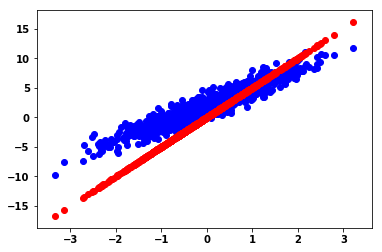

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(inputs, outputs, c="b")
plt.scatter(inputs, model(inputs), c="r")

print("Current loss:")
print(loss(model(inputs), outputs).numpy())

### 定义训练循环

我们已经定义了网络模型，并且获得了训练数据。现在对模型进行训练，采用梯度下降的方式，通过训练数据更新模型的变量（W 和 b）使得损失量变小。梯度下降中有很多参数，通过 tf.train.Optimizer 实现。

In [56]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

最后，我们对训练数据重复地训练，观察 W 和 b 是怎么变化的。

Epoch  0: W=5.00 b=0.00, loss=9.15660
Epoch  1: W=4.59 b=0.41, loss=6.18337
Epoch  2: W=4.27 b=0.73, loss=4.29435
Epoch  3: W=4.01 b=0.98, loss=3.09414
Epoch  4: W=3.80 b=1.19, loss=2.33155
Epoch  5: W=3.63 b=1.35, loss=1.84700
Epoch  6: W=3.50 b=1.48, loss=1.53911
Epoch  7: W=3.39 b=1.58, loss=1.34346
Epoch  8: W=3.31 b=1.66, loss=1.21914
Epoch  9: W=3.24 b=1.73, loss=1.14013


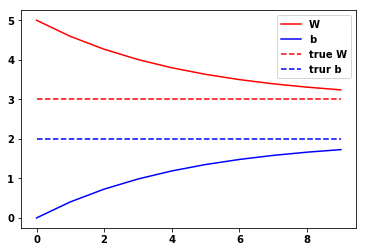

In [57]:
model = Model()

# 收集 W和b的历史数值，用于显示
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)
    
    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))
    
# 显示所有
plt.plot(epochs, Ws, "r",
        epochs, bs, "b")
plt.plot([TRUE_W] * len(epochs), "r--",
        [TRUE_b] * len(epochs), "b--")
plt.legend(["W", "b", "true W", "trur b"])
plt.show()

# 自定义训练：演示

这个教程将利用机器学习的手段来对鸢尾花按照物种进行分类。本教程将利用 TensorFlow 来进行以下操作：

1. 构建一个模型，
2. 用样例数据集对模型进行训练
3. 利用该模型对未知数据进行预测。

步骤：
+ 数据集的导入与解析
+ 选择模型类型
+ 对模型进行训练
+ 评估模型效果
+ 使用训练过的模型进行预测

## 环境搭建

In [58]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt

import tensorflow as tf

In [59]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.1.0
Eager execution: True


## 鸢尾花分类问题

想象一下，您是一名植物学家，正在寻找一种能够对所发现的每株鸢尾花进行自动归类的方法。机器学习可提供多种从统计学上分类花卉的算法。例如，一个复杂的机器学习程序可以根据照片对花卉进行分类。我们的要求并不高 - 我们将根据鸢尾花花萼和花瓣的长度和宽度对其进行分类。

鸢尾属约有 300 个品种，但我们的程序将仅对下列三个品种进行分类：

+ 山鸢尾
+ 维吉尼亚鸢尾
+ 变色鸢尾

## 导入和解析数据集

In [60]:
# 下载数据集

train_data_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"
train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_data_url),origin=train_data_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
Local copy of the dataset file: C:\Users\huangm\.keras\datasets\iris_training.csv


In [61]:
# 检查数据

数据集 iris_training.csv 是一个纯文本文件，其中存储了逗号分隔值 (CSV) 格式的表格式数据.请使用 head -n5 命令查看前 5 个条目：

In [64]:
import pandas as pd

data = pd.read_csv(train_dataset_fp)
data.head()

,120,4,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


我们可以从该数据集视图中注意到以下信息：

1. 第一行是表头，其中包含数据集信息：
    * 共有 120 个样本。每个样本都有四个特征和一个标签名称，标签名称有三种可能。
    * 后面的行是数据记录，每个样本各占一行，其中：
        + 前四个字段是特征: 这四个字段代表的是样本的特点。在此数据集中，这些字段存储的是代表花卉测量值的浮点数。
        + 最后一列是标签:即我们想要预测的值。对于此数据集，该值为 0、1 或 2 中的某个整数值（每个值分别对应一个花卉名称）。

In [65]:
# CSV文件中列的顺序
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


每个标签都分别与一个字符串名称（例如 “setosa” ）相关联，但机器学习通常依赖于数字值。标签编号会映射到一个指定的表示法，例如:
+ 0 : 山鸢尾
+ 1 : 变色鸢尾
+ 2 : 维吉尼亚鸢尾

In [66]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

创建一个tf.data.Dataset

TensorFlow的 Dataset API 用于读取数据并将其转换为可供训练使用的格式。

由于数据集是 CSV 格式的文本文件，请使用 make_csv_dataset 函数将数据解析为合适的格式。由于此函数为训练模型生成数据，默认行为是对数据进行随机处理 （shuffle=True, shuffle_buffer_size=10000），并且无限期重复数据集（num_epochs=None）。 我们还设置了 batch_size 参数:

In [67]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1
)

make_csv_dataset 返回一个(features, label) 对构建的 tf.data.Dataset ，其中 features 是一个字典: {'feature_name': value}

In [72]:
# 这些 Dataset 对象是可迭代的

features, labels = next(iter(train_dataset))

print(features)
print(labels)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([6. , 5.7, 4.7, 5.8, 5.2, 5. , 6.7, 4.9, 5.3, 6.2, 5.1, 4.8, 4.7,
       6.4, 5.9, 6.6, 6.4, 6. , 6.7, 6.1, 6.1, 4.6, 5.7, 6.5, 5.2, 5.7,
       4.8, 5.5, 5.8, 5.6, 6.1, 7. ], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([2.7, 3.8, 3.2, 4. , 2.7, 3.4, 3.1, 3.1, 3.7, 2.2, 3.8, 3.1, 3.2,
       2.8, 3. , 3. , 2.7, 2.2, 3. , 2.6, 2.8, 3.2, 2.8, 2.8, 3.5, 2.8,
       3. , 2.4, 2.7, 2.5, 3. , 3.2], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5.1, 1.7, 1.3, 1.2, 3.9, 1.5, 4.4, 1.5, 1.5, 4.5, 1.6, 1.6, 1.6,
       5.6, 5.1, 4.4, 5.3, 5. , 5.2, 5.6, 4. , 1.4, 4.5, 4.6, 1.5, 4.1,
       1.4, 3.7, 5.1, 3.9, 4.9, 4.7], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.6, 0.3, 0.2, 0.2, 1.4, 0.2, 1.4, 0.1, 0.2, 1.5, 0.2, 0.2, 0.2,
       2.1, 1.8, 1.4, 1.9, 1.5, 2.3, 1.4, 1.3, 0.2, 1.3, 1.5,

注意到具有相似特征的样本会归为一组，即分为一批。更改 batch_size 可以设置存储在这些特征数组中的样本数。

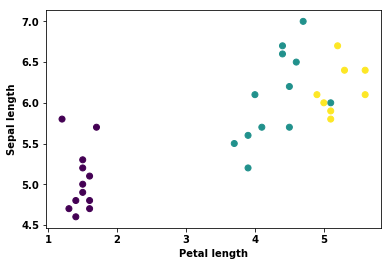

In [74]:
# 绘制

plt.scatter(features["petal_length"],
           features["sepal_length"],
           c=labels,
           cmap="viridis")
plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

创建一个函数以将特征字典重新打包为形状为 (batch_size, num_features) 的单个数组。   
此函数使用 tf.stack 方法，该方法从张量列表中获取值，并创建指定维度的组合张量:

In [96]:
def pack_features_vector(features, labels):
    """将特征打包到一个数组中"""
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

然后使用 tf.data.Dataset.map 方法将每个 (features,label) 对中的 features 打包到训练数据集中：

In [76]:
train_dataset = train_dataset.map(pack_features_vector)

Dataset 的特征元素被构成了形如 (batch_size, num_features) 的数组。我们来看看前几个样本:

In [79]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[6.7 3.1 4.4 1.4]
 [4.6 3.1 1.5 0.2]
 [6.5 3.  5.8 2.2]
 [5.8 2.6 4.  1.2]
 [5.7 2.8 4.5 1.3]], shape=(5, 4), dtype=float32)


## 选择模型及创建模型

使用Keras创建模型

tf.keras.Sequential 模型是层的线性堆叠。该模型的构造函数会采用一系列层实例；在本示例中，采用的是 2 个密集层（各自包含10个节点）,以及 1 个输出层（包含 3 个代表标签预测的节点。第一个层的 input_shape 参数对应该数据集中的特征数量，它是一项必需参数：

In [82]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])

激活函数可决定层中每个节点的输出形式。 这些非线性关系很重要，如果没有它们，模型将等同于单个层。激活函数有很多种，但隐藏层通常使用 ReLU。

使用模型

In [83]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-0.4091736 , -1.9795117 , -1.8315954 ],
       [-0.5253151 , -0.7307493 , -0.89098245],
       [-0.5358624 , -2.1665707 , -2.24405   ],
       [-0.3898579 , -1.6975722 , -1.6181203 ],
       [-0.4486277 , -1.5641112 , -1.7271706 ]], dtype=float32)>

这些对数转换为每个类别的概率，请使用 softmax 函数:

In [84]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.6900815 , 0.1435196 , 0.16639888],
       [0.3987198 , 0.324675  , 0.2766053 ],
       [0.7262244 , 0.1421881 , 0.13158743],
       [0.63969773, 0.17299823, 0.18730408],
       [0.6225877 , 0.20405732, 0.17335501]], dtype=float32)>

对每个类别执行 tf.argmax 运算可得出预测的类别索引。不过，该模型尚未接受训练，因此这些预测并不理想

In [85]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
    Labels: [1 0 2 1 1 0 0 2 1 0 2 2 0 2 2 0 0 2 0 0 2 1 0 1 2 1 1 0 2 1 0 0]


## 训练模型

定义损失和梯度函数

我们的模型会使用 tf.keras.losses.SparseCategoricalCrossentropy 函数计算其损失，此函数会接受模型的类别概率预测结果和预期标签，然后返回样本的平均损失。

In [86]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [87]:
def loss(model, x, y):
    y_ = model(x)
    return loss_object(y_true=y, y_pred=y_)

l = loss(model,features, labels)
print("Loss, test:{}".format(l))

Loss, test:1.484809160232544


使用 tf.GradientTape 的前后关系来计算梯度以优化你的模型:

In [88]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

创建优化器

优化器 会将计算出的梯度应用于模型的变量，以使 loss 函数最小化

TensorFlow有许多可用于训练的优化算法。此模型使用的是 tf.train.GradientDescentOptimizer ， 它可以实现随机梯度下降法（SGD）。learning_rate 被用于设置每次迭代（向下行走）的步长

In [89]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [90]:
# 计算单个优化步骤

loss_value, grads = grad(model, features, labels)
print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))
optimizer.apply_gradients(zip(grads, model.trainable_variables))
print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels).numpy()))

Step: 0, Initial Loss: 1.484809160232544
Step: 1,         Loss: 1.3290023803710938


训练循环

一切准备就绪后，就可以开始训练模型了！训练循环会将数据集样本馈送到模型中，以帮助模型做出更好的预测。以下代码块可设置这些训练步骤：

1. 迭代每个周期。通过一次数据集即为一个周期。
2. 在一个周期中，遍历训练 Dataset 中的每个样本，并获取样本的特征（x）和标签（y）。
3. 根据样本的特征进行预测，并比较预测结果和标签。衡量预测结果的不准确性，并使用所得的值计算模型的损失和梯度。
4. 使用 optimizer 更新模型的变量。
5. 跟踪一些统计信息以进行可视化。
6. 对每个周期重复执行以上步骤。

num_epochs 变量是遍历数据集集合的次数。与直觉恰恰相反的是，训练模型的时间越长，并不能保证模型就越好。  
num_epochs 是一个可以调整的超参数。选择正确的次数通常需要一定的经验和实验基础。

In [91]:
## Note: 使用相同的模型变量重新运行此单元

# 保留结果用于绘制

train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
    
    # Training loop - using batches of 32
    for x, y in train_dataset:
        # 优化模型
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        # 追踪进度
        epoch_loss_avg(loss_value)  # 添加当前的 batch loss
        # 比较预测标签和真实标签
        epoch_accuracy(y, model(x))
        
    # 循环结束
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
    
    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.269, Accuracy: 20.833%
Epoch 050: Loss: 0.076, Accuracy: 97.500%
Epoch 100: Loss: 0.056, Accuracy: 98.333%
Epoch 150: Loss: 0.054, Accuracy: 98.333%
Epoch 200: Loss: 0.052, Accuracy: 99.167%


可视化损失函数随时间推移而变化的情况

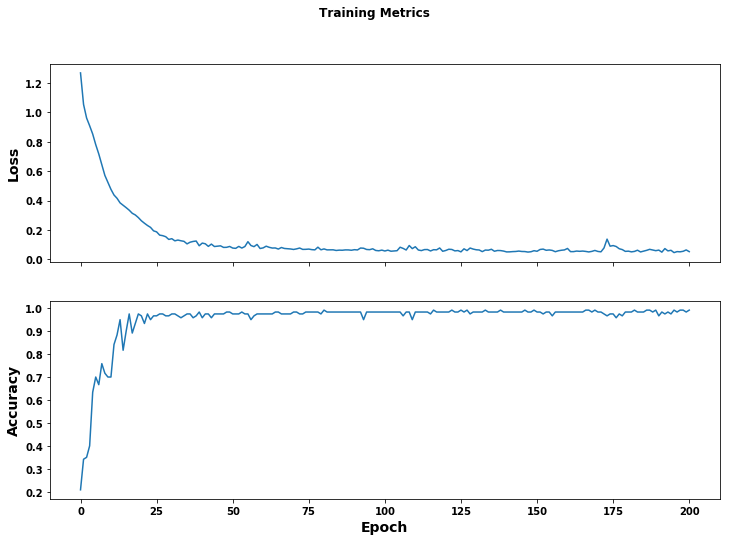

In [93]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle("Training Metrics")

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

### 评估模型的效果

建立测试数据集

In [94]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [97]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

根据测试数据集评估模型

与训练阶段不同，模型仅评估测试数据的一个周期。在以下代码单元格中，我们会遍历测试集中的每个样本，然后将模型的预测结果与实际标签进行比较。这是为了衡量模型在整个测试集中的准确率

In [98]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
    logits = model(x)
    prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)
    
print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


例如，我们可以看到对于最后一批数据，该模型通常预测正确：

In [99]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]])>

## 使用经过训练的模型进行预测

现在，我们使用经过训练的模型对 无标签样本（即包含特征但不包含标签的样本）进行一些预测。

In [101]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
    class_dix = tf.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_dix]
    name = class_names[class_dix]
    print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (100.0%)
Example 1 prediction: Iris versicolor (99.9%)
Example 2 prediction: Iris virginica (96.2%)
